In [1]:
import numpy as np
import pandas as pd

In [3]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 310.6 kB/s eta 0:00:11
   ----- ---------------------------------- 0.5/3.8 MB 310.6 kB/s eta 0:00:11
   ----- ---------------------------------- 0.5/3.8 MB 310.6 kB/s eta 0:00:11
   ----- ---------------------------------- 0.5/3.8 MB 310.6 kB/s eta 0:00:11
   ----- ---------------------------------- 0.5/3.8 MB 310.6 kB/s eta 0:00:11
   -------- ------------------------------- 0.8/3.8 MB 286


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for distutils


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import r2_score,accuracy_score

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]

In [6]:
X_train,X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2 , random_state=2)

In [11]:
rt = DecisionTreeRegressor(criterion='squared_error' , max_depth=2)

In [12]:
rt.fit(X_train , Y_train)


DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[12] <= 9.725\nsquared_error = 84.57\nsamples = 404\nvalue = 22.441'),
 Text(0.25, 0.5, 'x[5] <= 7.47\nsquared_error = 83.234\nsamples = 167\nvalue = 29.675'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 43.52\nsamples = 143\nvalue = 27.085'),
 Text(0.375, 0.16666666666666666, 'squared_error = 41.696\nsamples = 24\nvalue = 45.108'),
 Text(0.75, 0.5, 'x[0] <= 5.782\nsquared_error = 22.662\nsamples = 237\nvalue = 17.344'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 13.202\nsamples = 168\nvalue = 19.227'),
 Text(0.875, 0.16666666666666666, 'squared_error = 16.058\nsamples = 69\nvalue = 12.761')]

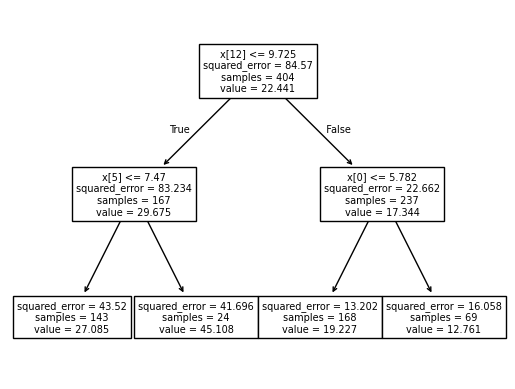

In [13]:
from sklearn.tree import plot_tree
plot_tree(rt)

In [9]:
Y_pred = rt.predict(X_test)

In [23]:
r2_score(Y_test , Y_pred)

0.7345706505656491

In [24]:
from sklearn.model_selection import cross_val_score

In [56]:
np.mean(cross_val_score(DecisionTreeRegressor(criterion='friedman_mse' , max_depth=4 , min_samples_split=0.25 , max_features=0.5) , X , Y , cv=5 , scoring='r2'))

np.float64(-0.43790582028603603)

<h1>HyperParameter tuning</h1>

In [44]:
param_grid = {
    'max_depth' : [ 2 , 4 , 8 , 10 , None],
    'criterion' : [ 'squared_error' , 'absolute_error' ],
    'max_features' : [ 0.25 , 0.5 , 1 ],
    'min_samples_split' : [ 0.25 , 0.5 , 1 ]
}

In [45]:
reg = GridSearchCV(DecisionTreeRegressor() , param_grid=param_grid)

In [46]:
reg.fit(X_train , Y_train)

c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Li

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1],
                         'min_samples_split': [0.25, 0.5, 1]})

In [47]:
reg.best_score_

np.float64(0.6333204213836006)

In [48]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [57]:
for importance , name in sorted(zip(rt.feature_importances_ , X_train.columns) , reverse=True):
    print( name , importance)

lstat 0.505923711003219
rm 0.2893268360533458
dis 0.08692077179372652
crim 0.07075890393736635
ptratio 0.03200174279732337
age 0.006615129071902
nox 0.006450004182494685
indus 0.00200290116062241
zn 0.0
tax 0.0
rad 0.0
chas 0.0
b 0.0
